In [2]:
#Import the necessary packages

import numpy as np


import matplotlib.pyplot as plt
#How to plot a histogram 
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
#https://stackoverflow.com/questions/7805552/fitting-a-histogram-with-python
#https://www.geeksforgeeks.org/matplotlib-pyplot-hist-in-python
#https://stackoverflow.com/questions/33203645/how-to-plot-a-histogram-using-matplotlib-in-python-with-a-list-of-data
plt.style.use('science')
#https://github.com/garrettj403/SciencePlots


from scipy.optimize import curve_fit
from scipy.stats import norm #In order to fit a gaussian distribution to the histogram  (mu, sigma) = norm.fit(data)

The Gaussian distribution is described by:

$$\huge f(x) = \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

where:

$$\huge \sigma = \sqrt{\mu}$$

Therefore we create a function gauss that returns the normalized gaussian distribution:

In [3]:
def gauss (x, mu, sigma):
	return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))

we define a linear function to fit to the plateau of the efficiency plot:

In [4]:
def linear (x, a, b):
	return a*x + b

Efficiency vs Voltage Plot for $\large^{60}Co$

The efficiency is defined as the ratio of the number of particles detected to the number of particles that fall onto the detector.

Since the distance between the detector and te source is constant, the efficiency of the detector is proportional to the number of particles detected.

[  3.22199998 647.53334828]
[  0.31429345 283.59071132]


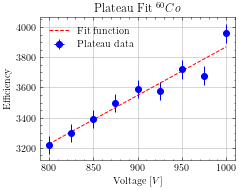

In [18]:
efficiency_data_co = np.loadtxt('data_co60.txt')

volts = efficiency_data_co[:,0]
counts = efficiency_data_co[:,1]
counts_error = np.sqrt(counts)
	


#Linear fit to the plateau of the efficiency
fit_data = np.loadtxt('co_fit.txt')
xaxis = fit_data[:, 0]
yaxis = fit_data[:, 1]
popt, pcov = curve_fit(linear, xaxis, yaxis, p0=(1000, 10))
print(popt)
print(np.sqrt(np.diag(pcov)))
x = np.linspace(np.min(xaxis), np.max(xaxis), 10000)

plt.errorbar(xaxis, yaxis, np.sqrt(yaxis), xaxis*0, 'bo')
plt.plot(x, linear(x, *popt), 'r--')
plt.grid()
plt.title('Plateau Fit $^{60}Co$')
plt.ylabel('Efficiency')
plt.xlabel(r'Voltage $[V]$')
plt.legend(['Fit function', 'Plateau data'])
plt.savefig('plateau-co.png', dpi=500)


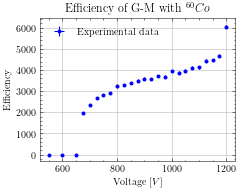

In [19]:
#Plot both the experimental data and the fit function.

plt.errorbar(volts, counts, counts_error, volts*0, 'bo', markersize=3)
#plt.plot(x, linear(x, *popt), 'r--')
plt.title('Efficiency of G-M with $^{60}Co$')
plt.xlabel(r'Voltage $[V]$')
plt.ylabel('Efficiency')
plt.grid()
plt.legend(['Experimental data'])
plt.savefig('efficiency_co.png', dpi=500)

Efficiency vs Voltage Plot for $\large^{90}Sr$

[    8.42466666 -1690.75555556]
[  0.51700016 466.495369  ]


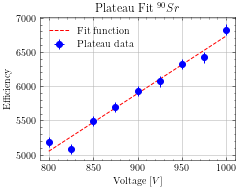

In [20]:
efficiency_data_sr = np.loadtxt('data_sr90.txt')

volts = efficiency_data_sr[:,0]
counts = efficiency_data_sr[:,1]
counts_error = np.sqrt(counts)


fit_data = np.loadtxt('sr_fit.txt')
xaxis = fit_data[:, 0]
yaxis = fit_data[:, 1]
popt, pcov = curve_fit(linear, xaxis, yaxis, p0=(1000, 10))
print(popt)
print(np.sqrt(np.diag(pcov)))

x = np.linspace(np.min(xaxis), np.max(xaxis), 10000)

plt.errorbar(xaxis, yaxis, np.sqrt(yaxis), xaxis*0, 'bo')
plt.plot(x, linear(x, *popt), 'r--')
plt.grid()
plt.title('Plateau Fit $^{90}Sr$')
plt.ylabel('Efficiency')
plt.xlabel(r'Voltage $[V]$')
plt.legend(['Fit function', 'Plateau data'])
plt.savefig('plateau-sr.png', dpi=500)

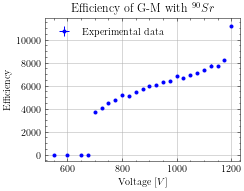

In [21]:


plt.errorbar(volts, counts, counts_error, volts*0, 'bo', markersize=3)
plt.title('Efficiency of G-M with $^{90}Sr$')
#plt.plot(x, linear(x, *popt), 'r--')
plt.xlabel(r'Voltage $[V]$')
plt.ylabel('Efficiency')
plt.grid()
plt.legend(['Experimental data'])
plt.savefig('efficiency_sr.png', dpi=500)

The distribution of the counts measured in a specific time period follows a gaussian distribution.

Therefore, we can fit a gaussian function to the normalized histogram

μ =  1748.0
σ =  46.0
sqrt(μ+1) =  42.0


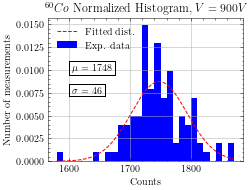

In [23]:
distribution = np.loadtxt('co_distribution.txt')
mu, sigma = norm.fit(distribution)
print("μ = ", np.round(mu,0))
print("σ = ", np.round(sigma,0))
print("sqrt(μ+1) = ", np.round(np.sqrt(mu+1),0))
min = np.min(distribution)
max = np.max(distribution)
bin = int((max-min)/10)
x = np.linspace(min , max, 10000)

plt.hist(distribution, bin, density=True, color='Blue')
plt.plot(x, gauss(x, mu, sigma), 'r--')
plt.grid()
plt.title('$^{60}Co$ Normalized Histogram, $V = 900V$')
plt.xlabel('Counts')
plt.ylabel('Number of measurements')
plt.text(1600, 0.01, r'$\boxed{\mu = 1748}$')
plt.text(1600, 0.0075, r'$\boxed{\sigma = 46}$')
plt.legend(['Fitted dist.', 'Exp. data'])
plt.savefig('histogram_normalized.png', dpi=500)

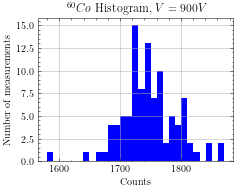

In [24]:
plt.hist(distribution, bin, density=False, color='Blue')
plt.grid()
plt.title('$^{60}Co$ Histogram, $V = 900V$')
plt.xlabel('Counts')
plt.ylabel('Number of measurements')
plt.savefig('histogram.png', dpi=500)

The radiation intensity passing through a medium is described by:

$$\Large I(\chi ) = I_0 e^{-\mu \chi}$$

We create an exponential function to fit to the intensity data for each $\chi$

In [11]:
def intensity (x, a, b):
	return a*np.exp(-b*x)

$$\huge Fe$$

[85.40225746  0.35752538]
[11.47396552  0.02686757]


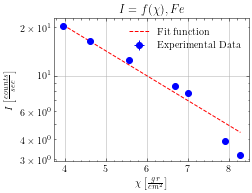

In [25]:
fe_data = np.loadtxt('fe_rate.txt')
al_data = np.loadtxt('al_rate.txt')
pb_data = np.loadtxt('pb_rate.txt')

x_fe = fe_data[:,0]
I_fe = fe_data[:,1]

popt, pcov = curve_fit(intensity, x_fe, I_fe, p0=(11, 0.1))
print(popt)
print(np.sqrt(np.diag(pcov)))
x = np.linspace(np.min(x_fe), np.max(x_fe), 10000)
plt.errorbar(x_fe, I_fe, I_fe*0, I_fe*0, 'bo')
plt.plot(x, intensity(x, *popt), 'r--')
plt.grid()
plt.title('$I = f(\chi ), Fe$')
plt.xlabel(r'$\chi \left[\frac{gr}{cm^2}\right]$')
plt.ylabel(r'$I \left[\frac{counts}{sec}\right]$')
plt.legend(['Fit function', 'Experimental Data'])
plt.savefig('intensity_fe.png', dpi=500)

plt.semilogy()
plt.savefig('intensity_fe_log.png', dpi=500)

$$\huge Al$$

[21.03869443  0.17633903]
[7.45965131 0.07361563]


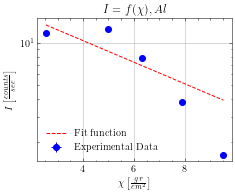

In [26]:
x_al = al_data[:,0]
I_al = al_data[:,1]

popt, pcov = curve_fit(intensity, x_al, I_al, p0=(11, 0.1))
print(popt)
print(np.sqrt(np.diag(pcov)))
x = np.linspace(np.min(x_al), np.max(x_al), 10000)
plt.errorbar(x_al, I_al, I_al*0, I_al*0, 'bo')
plt.plot(x, intensity(x, *popt), 'r--')
plt.grid()
plt.title('$I = f(\chi ), Al$')
plt.xlabel(r'$\chi \left[\frac{gr}{cm^2}\right]$')
plt.ylabel(r'$I \left[\frac{counts}{sec}\right]$')
plt.legend(['Fit function', 'Experimental Data'])
plt.savefig('intensity_al.png', dpi=500)

plt.semilogy()
plt.savefig('intensity_al_log.png', dpi=500)

$$\huge Pb$$

[83.03144537  0.3658019 ]
[11.56581467  0.02100933]


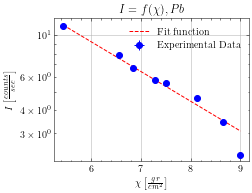

In [27]:
x_pb = pb_data[:,0]
I_pb = pb_data[:,1]

popt, pcov = curve_fit(intensity, x_pb, I_pb, p0=(11, 0.1))
print(popt)
print(np.sqrt(np.diag(pcov)))
x = np.linspace(np.min(x_pb), np.max(x_pb), 10000)
plt.errorbar(x_pb, I_pb, I_pb*0, I_pb*0, 'bo')
plt.plot(x, intensity(x, *popt), 'r--')
plt.grid()
plt.title('$I = f(\chi ), Pb$')
plt.xlabel(r'$\chi \left[\frac{gr}{cm^2}\right]$')
plt.ylabel(r'$I \left[\frac{counts}{sec}\right]$')
plt.legend(['Fit function', 'Experimental Data'])
plt.savefig('intensity_pb.png', dpi=500)

plt.semilogy()
plt.savefig('intensity_pb_log.png', dpi=500)